https://colab.research.google.com/drive/1UUWPWwZeRFQ3-YLL5SD3XdFD5qI-HkSU?usp=sharing 
내가 저번에 정리했던 것인데, 이것보다 훨씬 자세히 (but convoluted)하게 적혀있다! 이것다 보고이해하면 위의 링크타고가서 보기!

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## 집 연장하기!

## PyTorch
1. Tensor Library for DL using GPU&CPU

2. Autograd Engine
    * does backprop automatically
    * (do this by) storing gradietns for all tensors in networks and using them to do backprop
    
3. Define-by-run (cf : Define-and-run with Tensorflow)
    * dynamic network dynamically, more model flexibility (?)

# 1. Tensor

## 1.1. Attributes
* `shape`
    * `unsqueeze`, `squeeze` : (`(2) <-> (1,2)`)
    * `reshape` : (`(4)-> (2,2)`)
    * `permute` : (`(3,1,4) -> (4,1,3)`) (dimension swap)
* `dtype`
* `device` => which device the tensor is in

In [3]:
import torch

t1 = torch.arange(8).reshape(4,2)

In [4]:
print(t1)
print(t1.shape)
print(t1.device)
print(t1.dtype)

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7]])
torch.Size([4, 2])
cpu
torch.int64


In [4]:
device = "mps"
t1_mps = t1.to(device)
print(t1_mps.device)
print(t1.device)

mps:0
cpu


In [5]:
print("====unsqueeze=====")
#unsqueeze
t2 = torch.rand(2)

print("t2 : \n", t2, t2.shape)
print("t2.unsqueeze(0): \n", t2.unsqueeze(0),t2.unsqueeze(0).shape)
print("t2.unsqueeze(1): \n", t2.unsqueeze(1),t2.unsqueeze(1).shape)

#squeeze
print("====squeeze=====")
t3 = torch.rand(1,2,1)
print("t3 : \n", t3, t3.shape)
print("t3.squeeze(0) :\n", t3.squeeze(0),t3.squeeze(0).shape)
print("t3.squeeze(1) :\n", t3.squeeze(1),t3.squeeze(1).shape)
print("t3.squeeze(2) :\n", t3.squeeze(2),t3.squeeze(2).shape)

====unsqueeze=====
t2 : 
 tensor([0.7166, 0.5125]) torch.Size([2])
t2.unsqueeze(0): 
 tensor([[0.7166, 0.5125]]) torch.Size([1, 2])
t2.unsqueeze(1): 
 tensor([[0.7166],
        [0.5125]]) torch.Size([2, 1])
====squeeze=====
t3 : 
 tensor([[[0.2264],
         [0.0173]]]) torch.Size([1, 2, 1])
t3.squeeze(0) :
 tensor([[0.2264],
        [0.0173]]) torch.Size([2, 1])
t3.squeeze(1) :
 tensor([[[0.2264],
         [0.0173]]]) torch.Size([1, 2, 1])
t3.squeeze(2) :
 tensor([[0.2264, 0.0173]]) torch.Size([1, 2])


In [6]:
print("====reshape & permute======")
t4 = torch.arange(16).reshape(2,2,4)

print("t4 : \n", t4, t4.shape)
print("t4.reshape(2,4,2) : \n", t4.reshape(2,4,2), t4.reshape(2,4,2).shape)
print("t4.permute(2,1,0) : \n", t4.permute(2,0,1), t4.permute(2,1,0).shape)

====reshape & permute======
t4 : 
 tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]]]) torch.Size([2, 2, 4])
t4.reshape(2,4,2) : 
 tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5],
         [ 6,  7]],

        [[ 8,  9],
         [10, 11],
         [12, 13],
         [14, 15]]]) torch.Size([2, 4, 2])
t4.permute(2,1,0) : 
 tensor([[[ 0,  4],
         [ 8, 12]],

        [[ 1,  5],
         [ 9, 13]],

        [[ 2,  6],
         [10, 14]],

        [[ 3,  7],
         [11, 15]]]) torch.Size([4, 2, 2])


In [7]:
#Tensor attribu†e : device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#moving the M1 GPU instead
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

t2_gpu = t2.to(device)
print(t2.device) #t2 : in cpu
print(t2_gpu.device) #t2 : in gpu

cpu
mps:0


## 1.2. Tensor Operations

1. Basic Operations
2. Dimension Reduction
3. Broadcasting

In [8]:
import numpy as np
import torch

In [9]:
print("====basic setup=====")
t1 = torch.arange(4).reshape(2,2)
t2 = torch.ones(2,2)
print("t1 : \n", t1)
print("t2 : \n", t2)


print("=====convert numpy -> tensor====")
num_array = np.arange(4).reshape(2,2)
torch_tensor = torch.tensor(num_array)

print(type(num_array), '\n', num_array)
print(type(torch_tensor),'\n', torch_tensor)


print("=====element-wise operations====")
print("t1+torch.exp(t2)+3 :  \n",t1+torch.exp(t2)+3)


print("=====broadcasting====")
vector = torch.tensor([1,2])
print("vector : \n", vector)
print("t1+vector :  \n",t1+vector)
#if error : braodcasting 관련 documentatino 보기


====basic setup=====
t1 : 
 tensor([[0, 1],
        [2, 3]])
t2 : 
 tensor([[1., 1.],
        [1., 1.]])
=====convert numpy -> tensor====
<class 'numpy.ndarray'> 
 [[0 1]
 [2 3]]
<class 'torch.Tensor'> 
 tensor([[0, 1],
        [2, 3]])
=====element-wise operations====
t1+torch.exp(t2)+3 :  
 tensor([[5.7183, 6.7183],
        [7.7183, 8.7183]])
=====broadcasting====
vector : 
 tensor([1, 2])
t1+vector :  
 tensor([[1, 3],
        [3, 5]])


In [10]:
print("=====show indices of max/min (argmax, argmin)====")
import random
random.seed(3)
t1 = torch.randn(3,2)
print("t1 : \n",t1)
print("t1.argmax(axis=0) : \n",t1.argmax(axis=0))
print("t1.argmax(axis=1) : \n",t1.argmax(axis=1))
print("t1.argmax() : \n",t1.argmax())

print("======comapre for : when we keep dimensions ============")
print("t1.argmax(axis=1, keepdims) : \n",t1.argmax(axis=1, keepdims = True),
     t1.argmax(axis=1, keepdims = True).shape)



=====show indices of max/min (argmax, argmin)====
t1 : 
 tensor([[-0.0515, -0.1822],
        [-0.0233,  0.0018],
        [-0.6719,  1.2701]])
t1.argmax(axis=0) : 
 tensor([1, 2])
t1.argmax(axis=1) : 
 tensor([0, 1, 1])
t1.argmax() : 
 tensor(5)
======comapre for : when we keep dimensions ============
t1.argmax(axis=1, keepdims) : 
 tensor([[0],
        [1],
        [1]]) torch.Size([3, 1])


# 2. Data 

## 2.1. Data

* `torch.utils.data.Dataset` 
    * a python class defining a **Dataset**
    * called by `Dataloader` implicitly (dataloader을 쓰려면 이것이 필요)
    * transformation을 input으로 받아, 어떤 transformation을 행할지 정해주기도 함
    * custom Dataset class을 정의하고 싶다면, need to **MUST AT LEAST implement the following methods**
        * `__init__` : **initialize dir/file** to read images, transform 
        * `__getitem__` : **loads data** from dataset **at a given index** (ex : `XXX[0]`)
        * `__len__` : returns size of the dataset (ex : len(XXX))

<br> 

* `torch.utils.dataset.Dataloader`
    * Sends dataset to models
    * 이것을 쓰려면, 앞에서 말한 `Dataset`이 정의가 되어있어야 한다 (그래야 dataset을 가져와서 Dataloader이 model에 data 를 loading하니)
    * Paremeters
        * `batch_size` (default = 1)
        * `shuffle` (shuffle data for training)
        * `num_workers` (병렬연산때)
        

### 2.1.1. Custom Dataset 만들자 (using dummy random data)

위에서 말했듯이 3개의 methods가 무조건 들어가야하는데 그 셋이 쓰이는 방법이 조금씩 다름 (이거 왜 그런지 **ASK** (배웠던 것 같은데...?))
* `__init__` : should not do `return` 
* `__getitem__` : `dataset[3]` 이런식으로 call 한다
* `__len__` : `len(dataset)` 이런식으로 쓴다!
(사용예시 밑에 있다)

# ASK :         #여기서는 아무것도 return 하면 안됨! (return sth sth 하면 에러뜸! (__init__ 의 condition인듯?)) => ASK WHY
-> __init__ 이랑 __call__(getitem) __len__ 이런식으로 쓴다 
미리 Dataset이라고 된 곳에서 inherit하는 것이다 (거기있던 init, len, 을 가져오는 것) => so that we don't have to write everything (애초에 그렇게 설계가 되어있다) (거기다가 덮어서 쓸 수 있게)

그래서 call, len, init은 실행되는 것은 실행이 되는 시간이 정해져있다
(init : object를 만들떄 (instantiate)그 시점에 __init__이 실행되는 것)
(set attributes and stuff)

getitem : index 값 하나**만** 받을 수 있는 것 (list 도 일종의 class인데, list[2] : possible because list has the __getitem__ attribute

dataset 에서는 하나의 index 에 대해서 받아오는 것만 하고, index 여러개를 가져와야 한다면 dataloader에서 지정을 해준다 


==> 그래서 dataloader 이 model에 들어가는 것(dataset은 custom, dataloader은 거의 custom을 안한다)



In [11]:
#####Define dummy dataset#####
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class CustomDataset(Dataset): #must pass the `Dataset` as a parent class (to inherit its stuff)
    ###now let's define the three methods that was said to be "MUST" (init, getitem, len)
    
    def __init__(self): #here, the dataset is defined (usually by directory, but here literally made)
        n_dataset = 100
        
        #set random x data
        self.x_data = [] #initialize
        for _ in range(n_dataset): #make list with n_dataset # of samples (items)
            random_length = random.randint(5,10) #random length of each sample's x length
            self.x_data.append(np.random.randint(0,255,random_length)) #create random array and append
        
        #set random y data
        self.y_data = torch.rand(n_dataset, 1)
        
        print("SimpleDataset setting done")
        print(f'x_data shape: {len(self.x_data)}')
        print(f'x_data random length (1st, 4th, 46th): {len(self.x_data[0]),len(self.x_data[3]), len(self.x_data[45])}')
        print(f'y_data shape: {self.y_data.shape}')
        
        #여기서는 아무것도 return 하면 안됨! (return sth sth 하면 에러뜸! (__init__ 의 condition인듯?))
            
    def __len__(self):
        return len(self.x_data) # returns the length of the x_data (i.e. number of samples)
    
    def __getitem__(self, idx): #gets idx(index) as an input
        x = torch.FloatTensor(self.x_data[idx]) #i.e. get the ith sample's x data
        y = torch.FloatTensor(self.y_data[idx]) #i.e. get the ith sample's y data
        return x, y

    ####custom method definintion###
    #because the length of individual samples is not unifor, we must pad zeros to the right if there's some missing 
    #(for unifiorm batch input dimensions)
    
    def collate_fn(self, data): #gets data as input (구체적인 작동원리는 공부하지 말고 일단은 생략하자 )
        max_len = 10 #maximum length
        batch = [] #initial batch size
        
        for x,y in data: #i.e. data is XXXXXx
            x_padded = torch.cat([x, torch.zeros(max_len - x.shape[0])]) #i.e. 부족한 dim만큼 0으로 padding
            batch.append(x_padded) #i.e. now append the padded x to the batch      
        return torch.stack(batch) #now stack the batch `list` into an `tensor`


In [12]:
#initialize our dataset and stuff!

print("====first instantiating the dataset class====")
custom_data = CustomDataset() #initialize the custom_dataset class

print("====now lets try the datset methods====")
print("custom_data : ",custom_data)
print("custom_data.__init__ : ", custom_data.__init__) #as expected, doesn't return anything
print("len(custom_data) : ", len(custom_data))  #we can use `len` as if it's built-in! (forgot what it's called)
                                                #print(custom_data.__len__()) #option2, more obsecure method
print("custom_data[10] : ", custom_data[10]) #이런식으로 `__getitem__`했던 것 사용 가능!

====first instantiating the dataset class====
SimpleDataset setting done
x_data shape: 100
x_data random length (1st, 4th, 46th): (6, 6, 8)
y_data shape: torch.Size([100, 1])
====now lets try the datset methods====
custom_data :  <__main__.CustomDataset object at 0x7f92a8f6eac0>
custom_data.__init__ :  <bound method CustomDataset.__init__ of <__main__.CustomDataset object at 0x7f92a8f6eac0>>
len(custom_data) :  100
custom_data[10] :  (tensor([216.,  59., 161., 113.,  57.,  19.,   2.,  58.,  27.]), tensor([0.7552]))


### 2.1.2. Custom Dataloader 만들자 (using cusotm Dataset class we made)

We will use `DataLoader` class, which was already imported before
some optoins we can set : 
* `shuffle`
* `batch_size`
* `collate_fn` 
* $\cdots$ (생략)

In [13]:
#create dataloder isntance
#here, batch_size , shuffle 등등 : 이미 Torch의 dataloader에 구현되어있는 것들이어서 class input으로만 넣어주면 끝!

custom_dataloader = DataLoader(custom_data , batch_size = 25, shuffle = True,  
                               collate_fn = custom_data.collate_fn, ) #instantiate Dataloader class with (an instance of) thecustom dataset 

print(custom_dataloader)

#왜 밑에서처럼 되는지 모르겠으나 일단은 간단하게 보는 거니 이유 보고 따지는 것은 skip (무슨 iterable object etcetc 와 연관이 있을 듯)

for batch_idx, samples in enumerate(custom_dataloader): #apparently, the object is enumerate-able
    #viewing the batch idx and sample shapes
    print("batch_idx : {} , sample.shape : {} ".format(batch_idx, samples.shape))
    
    #printing the last batch for example
    if batch_idx == len(custom_dataloader) -1 : #i.e. when it's the last batch
        print("last batch example : \n",samples) 
#print(custom_dataloader[0]) #apparently, not indexable...?
#print(next(custom_dataloader)) #not an iterator

batch_idx : 0 , sample.shape : torch.Size([25, 10]) 
batch_idx : 1 , sample.shape : torch.Size([25, 10]) 
batch_idx : 2 , sample.shape : torch.Size([25, 10]) 
batch_idx : 3 , sample.shape : torch.Size([25, 10]) 
last batch example : 
 tensor([[  5., 220.,  44.,  38.,  20., 188.,  71.,  14., 120.,  32.],
        [116.,  81., 152.,   0., 237., 166., 203.,   0.,   0.,   0.],
        [201.,  50.,  70., 101., 223.,  95., 128., 223.,   0.,   0.],
        [164.,  50.,  13.,  68., 160.,   0.,   0.,   0.,   0.,   0.],
        [135.,   8.,  84., 198., 253.,   0.,   0.,   0.,   0.,   0.],
        [216.,  59., 161., 113.,  57.,  19.,   2.,  58.,  27.,   0.],
        [ 66., 200., 137., 231.,  69.,  22., 145.,  42.,  92.,   0.],
        [105.,  87., 184., 167., 239.,   0.,   0.,   0.,   0.,   0.],
        [233., 188.,  72.,  13., 183.,  12.,  22., 252.,   0.,   0.],
        [ 10., 237., 109.,  60.,  45., 201.,  83.,  82., 149., 191.],
        [ 10., 181., 155.,  91., 241., 104.,  17.,  46.,   0.,   

In [14]:
#DataLoader?

## 2.2. Pre-loaded dataset

참고로, 위에서 custom하게 dataset 정의해도 되지만, `Torchvision` 같은 데에서, `Dataset class inherit`가 이미된, dataset을 제공해주기도 한다! 밑에서 실제로 ML할때는 이것을 사용해서 하도록 하자! (will use MNIST)

# 3. ACTUALLY implementing a model with example dataset (MNIST)

 ## 3.1. Preparing DataSet, DataLoader (MNIST)
이미 Dataset 으로 제공되는 MNIST를 가지고 해보자!

In [15]:
from torch.utils.data import DataLoader
from torchvision import datasets 
from torchvision.transforms import ToTensor #to go from image to tensor I believe



####1. instantiate DataSet!#####
train_data = datasets.MNIST(
    train = True, #the only thing different with test_data, specfieis that we want training dataset
    root = "data",
    download = True,
    transform = ToTensor() #import as torch tensor
)

test_data = datasets.MNIST(
    train = False, #the only thing different with test_data, specfieis that we want training dataset
    root = "data",
    download = True,
    transform = ToTensor() #import as torch tensor
)


####2. instantiate DataLoader (using previously defined dataset)#####
batch_size_to_use = 64 #arguments for DataLoader
train_loader = DataLoader(train_data, batch_size = batch_size_to_use , shuffle = True)
test_loader = DataLoader(test_data, batch_size= batch_size_to_use, shuffle=True)

example data shape :  torch.Size([64, 1, 28, 28])
example target shape :  torch.Size([64])


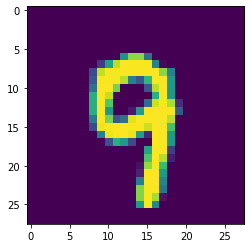

In [16]:
###looking at one example###
import matplotlib.pyplot as plt

##왜 이렇게 작동하는지 지금은 잘 모르겠다... for now, just roll with it
examples = enumerate(test_loader) 

batch_idx , (example_data, example_targets) = next(examples)

print("example data shape : ", example_data.shape) #[64,1,28,28] : batch size of 64, color of 1, 28*28 image (I think)
print("example target shape : ", example_targets.shape)

#look at first sample of the batch 
plt.imshow(example_data[0].squeeze()) 

## 3.2. Building Model

use `torch.nn` module's `nn.Module`!!! and use inheritance to create an instance! (`nn`은 module이고, `nn.Module`이 class 라서 그런듯?)

 **REQUIREMENTS WHEN MAKING A MODEL**
 * inherit from **`nn.Module`** (NOT `nn`!!!)
 * `__init__` 가 있어야함
     * `super(custom_NN, self).__init__()` 가 되어있어야 한다! (probably to bring attributes)
     * 여기서 보통, `self.fc1 = nn.Linear(28*28, 128)` 이런식으로, forward할때 쓰일 것들을 attribute로 정의함
         * 아마도 `nn.Linear`로 하는 이유가, 이렇게 하면 자동으로 gradient tracking을 해서 나중에 Autograd할때 쓰이기 때문일듯..? (ASK)
 * `__forward__` 가 있어야함 (for forward-propagation)
     * use `__init__`에서 정의한 stuff to make 
     * use `F.relu` and so on to make nonlinear layer
 
 
<br>

**some things that are used**
* `torch.nn.functional as F` are frequently used 
    * ex : `F.relu`, `F.sigmoid`

<br>
again, 

* `nn` : module

* `nn.Module` : base class for all NN modules 

$\therefore$, custom class를 만들때는 `nn`이 아닌 `nn.Module`에서 가져와야함!

# **QnA**
Q1. 밑에서 forward할떄, `x = x.reshape(-1, 784)`, 즉 (shape : [1,784])을 쓰는데, why not use shape [784]??
* A : 왜냐하면 torch 에서는 shape가 `[(batch size), (input vector size)]`로 되어있어야 해서!!!!!
    * `nn.Linear`이런 함수들도 **모두 `[(batch size, (input vector)]` 꼴**의 input을 받도록 설계되어있다 
    * 따라서, batchsize=1이어도 1을 꼭 넣어줘서 [1,784]로 해야한다
        * `.reshape[-1,784]`는, `[1*784] -> [1,784]`, `[2,2*784] -> [4,784]` 등의 꼴로 만들어주는 역할! (즉, -1은 일종의 `magic` resahping)
        * 따라서 `-1`을 reshaping에 쓰는 것은 batch size 상관없이 

# **ASK** 
1. `x = x.reshape(-1, 784) #shape : (1,784) => ASK why not [784] 안쓰고 [1,784]?`
A : nn.Linear : weight가 있는 것이다 그런데 nn.Linear에서의 약속은 ['batch dimension', 'weight에 곱하는 feature dimension']으로 정의를 했기 때문에, 무조건 첫번째 dimension은 batch 가 되도록 정해주는 것이다! (즉, batchsize=1이어도 1을 꼭 넣어줘서 [1,784] ) (-1의의미 : 임의의 어떤 값 (flexible하게 내가 주는 것에 따라서 달라진다)(모아서 update하는지 등등은 training loop 에서 지정한다 (-1은 어떤 batch size든 되도록 하기위해서 하는 것. batch size가 확실하면 지정해줄 수 는 있지만 not-robust)


2. `super`이 하는 것은 어떤 attribute를 가져오는 것인가? 그냥 `class custom_NN(nn.module)` 이라고 할때, `nn.Module`이 이미 inherit된것이 아닌가? super 을 하면 어떻게 다른거지?
A : `super` : nn.Module을 상속받으머ㅕㄴ method는 받으나, `__init__`은 자동으로 상속되지 앟는다 그래서 super을 해주는 것 (보통 그냥 넣어주면 안전)(__init__은 연산이라기 보다는 그냥 불러오는 것이어서 용량걱정 같은거는 안해도 될듯)(그런데 제품을 받을때는 어떤 method는 상속안되도록 capsule화를 시킨다. 그래서 self.__fc1 이렇게 하면 이것은 상속을 안받는 것으로 하기는 한다) 
A : 사실 __init__을 불러오는 것도 내 바로 위에있는 아이한테 상속받는다는 뜻이고, 여기서는 nn.Module을 지정했기에 super내에서 따로 지칭을 안해도 nn.Module을 가져온다
=> 그런데 만약 nn.Module의 부모의 부모 등등도 받고싶다고하면 그런 방법들도 존재한다 (super 은 부모한테만 받아온다는 뜻)
=> 상속자체는 주로 기본적으로 하나만 한다

3. `nn.Module`에 없는 operation이 없으면 내가 직접 수학적인 수식을 코드로 표현해서 넣을 수 있는 가? 어떻게 해야하는가? 예시가 있는 가?
=> nn.Linear안에 약속이 있는 것이었는데 그런식으로 layer을 지정해줄 수 있다 (custom operation) (nn.Linear source코드 비슷하게)

4. 위에서 적은, `__init__`에서  `nn.Linear`로 하는 이유에 대해서 묻기 : is it really
     * 아마도 `nn.Linear`로 하는 이유가, 이렇게 하면 자동으로 gradient tracking을 해서 나중에 Autograd할때 쓰이기 때문일듯..? (ASK)
     
 
5. `nn.Linear`을 `__init__`이 아닌 `forward`에서 써서 정의해도 되는가?
=> 이러헥 하면 안된다! 
because :
1. deeplearning : 고정된 weight를 변화시키는 건데, forward는 input이 들어올때마다 실행되ㅡㄴ 것이니 만약 거기서 nn.linaer을 하게되면 그때마다 layer 를 initialize하게 된다=> 따라서 이렇게 하면 triaing이 안된다
=> 즉, self.fc2에 "weight"가 저장됨 

=> 이러한 이유때문에, 
128 => 128 => 128 ->10 
여기서 forward할때 self.fc2(x), self.fc2(x)두번을 하면...? => 같은 layer을 여러번 돌리는 것이라서 하면 안된다! => 이러려면 fc2,fc3이런시그올 해야함

한번 backward를 하면 weight가 True가 된다 그래서 fc여러번 쓰는게 될지는 모르겠다 
==> 아마도 에러날듯 (forward를 한 후에 나중에 autograd 할때 두번저장된 weight이니) => 그게 의도한 바가 아닐 수도 있다 


만약 layer이 많다면 일일히 적어주기? => 방법은 많다
1. nn.Sequential 쓰는 사람도 있고
2. add하는 방법을 쓰는 방법도 있고 (dictioanry에다가 추가해서)(.save_dict)

In [1]:
a = torch.arange(16).reshape(2,2,2,2)
print(a)
print(a.shape)

print(a.reshape(-1,16))
print(a.reshape(-1,8))
#i.e. it's inferred!!!

NameError: name 'torch' is not defined

In [17]:
import torch.nn as nn 
import torch.nn.functional as F #module that has lots of functions that are frequently used (ex : sigmoid, relu, etc)

class custom_NN(nn.Module):
    def __init__(self):
        super(custom_NN, self).__init__() # bring attributes from nn.Module into this 이것 없으면 안됨!
        self.fc1 = nn.Linear(28*28, 128) #28*28 : sample size, 128 : hidden layer size
        self.fc2 = nn.Linear(128,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4_final = nn.Linear(64, 10) #10 : # of classes
        
    def forward(self, x): # x : input!
        x = x.reshape(-1, 784) #shape : (1,784) => ASK why not [784] 안쓰고 [1,784]?
        #x = x.flatten() #이렇게 하면 애러난다! (shape : (784)) => ask why
        x = F.relu(self.fc1(x)) #use F.relu method (matrix multiplication then relu func)
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        x = self.fc4_final(x) #final layer, don't apply nonlinear func, just linear combination
        return x 
        #option 2 : nn.Sequential (look at my original collab notes)

#instantiate the custom model!
network = custom_NN()  # this will be used kinda like the "model" in sklearn

In [18]:
##some observatino about the custom_NN class
print("=====custom_NN instance, network, 를 보자====")
network = custom_NN() 
print("network : \n",network)
print("network.parameters : \n",network.parameters) #used when defining Optim (for some reason)


print("=====samle data를 보자====")
sample_data = example_data[0] 
print("sample_data.shape : \n", sample_data.shape)

print("=====forward pass possible! (because we did `def forward()` before)=====")
print("network(sample_data)(forward pass) : \n", network(sample_data))

=====custom_NN instance, network, 를 보자====
network : 
 custom_NN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4_final): Linear(in_features=64, out_features=10, bias=True)
)
network.parameters : 
 <bound method Module.parameters of custom_NN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4_final): Linear(in_features=64, out_features=10, bias=True)
)>
=====samle data를 보자====
sample_data.shape : 
 torch.Size([1, 28, 28])
=====forward pass possible! (because we did `def forward()` before)=====
network(sample_data)(forward pass) : 
 tensor([[-0.0561,  0.1124,  0.1760, -0.3703, -0.1068, -0.1431,  0.3149, -0.6038,
         -0.1925,  0.4705]], grad_fn=<AddmmBackward0>)


/Users/eunmi/opt/anaconda3/envs/ML_tutor/lib/python3.8/site-packages/torch/nn/functional.py:1959: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


# DO FROM HERE!!

We'll do 

1. Training Loop (`def train():`)
2. Testing Loop (`def test():`)

## 3.3. Training a Model

### 필수
**Requirements when making a training loop**
* `model.train()` : turn **training mode on**
* **perform backprop/optimization** by following the steps:
    * `optim.zero_grad()` (b/c gradient by default adds up, so have to initialize for every mini-batch)
    * `output = model(input_tensor)` (i.e. forward pass once and get output)
    * `loss = loss_fn(output)` (i.e. compute loss) => also automatically makes computational tree, which enables Autograd engine)(i think)
        * 여기서 `loss` : just another torch TENSOR! (but with `requires_grad = True`)
        * 즉, 사실 밑에서 하는 `loss.backward()` 는 사실 아무 torch tensor (with `requires_grad=True`에 해도 되는 것!)
    * `loss.backward()` (compute gradient using Autograd engine)
    * `optim.step()` (perform optimization (backprop, 1 step) using gradient obtained previously)
* compute training loss (optional)
* `model.to(device)` ,`input_tensor.to(device)`, ... : tensor, model등을 device로 보내기!
* FINAL : perform training by calling `train(fjdklsjfklsdfl)` ...

<br>

common `train` loop function arguments (즉, 어떤 함수들을 가지고 어떤 방법으로 training할지도 밑에서 처럼 training loop의 argument로 들어가게 해서 조정할 수 있다!
* what model to train (`model` in code below)
* training data (`train_loader` in code below)
* optimization method (`optim` in code below)
* loss function definition (`loss_fn` in code below)
* nubmer of epochs (`epochs` in code below)
* CPU or GPU (`device` in code below)
** 위의 `optim`, `loss_fn` 옵션들은 예시가 많아서 적지 않았으나, 밑의 코드 예시를 보면 대충 알 수 있다 (ex : `optim.SGD`, `nn.CrossEntropyLoss()`)

#### 참고 할만한 것들 ####

1. **`loss` is just another torch tensor with `requires_grad = True`!!**
    * 이유는 notebook 맨 밑의 보충설명 (autograd engine and requires_grad and etc)를 보면 나오기는 하나, 간단하게 말하면 `loss` is just another tensor, and `.backward()` is an operation that can be applied to ANY tensor! (nn.Module을 inherit한 모델이 아니어도, computaitonal graph이기만 하면 된다) => notebook맨 밑에 그 예시가 나옴
    * 따라서  `(any tensor).backward()`도 가능하다! (notebook 맨 밑에서는 실제로 그렇게 함)
    
=> loss라고 하는 것은 nn.Linear을 거치고 계속하면 tensor=> tensor ... => tensor이라서 loss의 형태도 tensor이다
=> 대부분 prediction할때는 prediction 값 tensor랑 target 값 tensor이랑 이 둘간의 연산이 loss이기 때문에, 당연히 loss를 계산할때까지의 모든 것이 requires_grad로 되고, loss도 requires_gard = True인 tensor이 될 것이다.
=> 따라서 여기다가 loss.backward()를 하면 computational graph형태로 되어있던 것이 계산이 된다 
=> backward()는 변하는 것이 아니고 grad만 연산한느 것 (using torch.autograd)(실제 계산은 backward)

1. **`torch.autograd` engine**
    * use pytorch's built-in differentiation engine, `torch.autograd` => enables automatic computation of gradients for any computational graph (맨 밑에 이것에 대한 보충설명을 넣었다)
1. **참고로, 밑에서 epoch=1을 해도 Accuracy가 96%로 나오는 것을 볼 수 있다**
    * 이 이유는 **1 epoch $\neq$ 1 update** (but rather, **1 epoch = (# total samples)/(batch size) updates**)
1. `model.train()` VS `model.eval()` : https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch 여기보면 이해가 된다
1. `optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)` 이라고 optimizer instance 정의 시, `model.parameters()`를 input으로 넣어줘야함! (왜냐하면 이 함수는 사실 어떠한 computational graph이든 되도록 만들어진 거라서, 이 경우 model.parameters()를 넣어줘야한다)

evaluating mode ON :
 * model.eval() 
 * with torch.no_grad(): 
     dkslfjdlskfjdklsjfk

## ASK

* do I HAVE to use `model.train()` and `model.eval()` to set it to train/eval mode? because `https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html` 여기 pytorch documentation 에서는 그것들을 안해줘서..
=> 보통은 주로 해준다 (.train()할떄 쓰는 process와 model.eval()을 할떄 쓰이는 process가 다르다 (ex : and so on)
=> engine의 측면도있다 (dropout은 training할때는 넣고 forward에서는 죽이는데 그 eval을 안해주면 drouput이 활성화된 상태에서 inference를 해주는 것이라서)
=> model.train()은 grad계산여부는 아니고 batch normalization등등을 정해주는 모드가 된다(모델안에서 train/eval할때 달라지는 것을 쓸때 이것을 실행시킨다)


* why was `model.train()` turned on after `for epoch`?? what about before it? 
=> also possible, 조금 거슬리는 것이기는 하다(for loop안에 있으면)

* 위에서 `Autograd` engine등등 적은 것이 맞나?
* ask if my understanding of `loss` being just another tensor is correct

====

밑의 코드가 완전 좋은 것은 아니다 (epoch 을빼놓고 eㅔㅐ초
=> 지금처럼 func안에 train loop을 돌리고 해도 되고
=> train을 한 epoch만 돌리고 그것을 loop돌리는 것도 가능
    => this case : better management (hieararchical)(hiearchy is important)(choosing this hiearchy is upto the programmer, but 최대한 깔끔하게 block 안/밖사이읭 영향이 있다거나 그러면 안좋다)


In [19]:
#optim.SGD?
#help(nn.CrossEntropyLoss())

In [20]:
#Define Training Loop as a function
#notice the arguments of the funciton makes this training loop very flexible (can be used on any model, loss function, etc)

def train(model, optim, loss_fn, train_loader, epochs, device):
    #let's run the training
    for epoch in range(epochs):
        train_loss = 0.0
        model.train() #TURN TRAINING MODE ON
        for batch in train_loader:
            input_tensor, target = batch #get data
            input_tensor = input_tensor.to(device) #send to GPU 
            target = target.to(device)

            #computing gradient using Autograd engine
            optim.zero_grad()  #initialize
            output = model(input_tensor) 
            loss = loss_fn(output, target) 
            loss.backward()
            optim.step()
            train_loss += loss.data.item() #compute loss (i guess this is also an instance of using preexisting attribuet of loss?)
        train_loss /= len(train_loader.dataset) #i.e. normalize training loss
        print(f'Epoch: {epoch+1}, Training Loss: {train_loss}')
        #print("===showing that the loss computed during training is just another Tensor, just with `requires_grad = True`===\n",
              #type(loss), loss.requires_grad) 

In [21]:
##실제로 optim, loss_fn 등의 것들을 정해서 training을 시키자!
import torch.optim as optim

#optimizer, loss_fn and other setting (arguments of the trainining loop function)
optimizer = optim.SGD(network.parameters(), lr=1e-2, momentum=0.9) #i.e. parameters of custom NN as input, 
loss_function = nn.CrossEntropyLoss()
train_loader = train_loader #이미 정의했었다
num_epochs = 1
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu") 
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
network.to(device)


train(model = network, optim = optimizer, loss_fn = loss_function,
     train_loader = train_loader, epochs = num_epochs, device = device)

Epoch: 1, Training Loss: 0.021277688367664815


**note** : 위의 block을 여러번 돌리면  계속 training loss가 줄어든다 => 즉, weights가 (training loop돌릴때마다) optimize되는 것! (실제로 이렇게 for loop of trainining을 하도록 짤 수도 있다)

## 3.4. Testing the Model

### 필수
**Requirements when making a testing loop**
* `model.eval()` : turn **testing mode on**
* `with torch.no_grad():` (**이게 없으면 memory 잡아먹음, turns off gradient tracking)
* **calculate testing loss** by following steps: 
    * `output = model(input_tensor)` 
    * `loss = loss_fn(output, target)`
* add-up losses and normalize (to get average testing loss)
* `input_tensor.to(device)`, ... : tensor등을 device로 보내기!
* FINAL : perform testing by calling `test(Xxkjfkldjf)` ...


<br>
common `test` loop function arguments 
* what model to test (`model` in code below) (required to compute the loss)
* loss function definition (`loss_fn` in code below)
* CPU or GPU (`device` in code below)


<br>
##
* `https://pytorch.org/docs/stable/generated/torch.no_grad.html` : 여기서 `torch.no_grad` documentation보기

### ASK
* `with ` statement가 python 에서 무슨 의미?
=> with 를 쓰는 것은 with밑의 있는 것들이 이 효과를 다 받도록 하는 것이다 (with하고 효과가 들어가는 상태에서 밑의 것을 하겠다)
=> with syntax : 깔금하게 하기 위한것도 있다 
=> with안넣고 torch.no_grad()만 하면 계속 no_grad가 되어서 계산이 안되는 것이 일언라수도 

* `#test_loss += loss.data.item()` 이렇게 한 이유?? (그냥 `test_loss` 해도 되던데..?) #원래버젼 ##ASK 
=> loss를 마지막에 print/저장해야하는데 그러려면 torch가 아니라 integer/float형태여야한다
=> 그래서, gpu위에있던 tensor을 cpu로 보내고 이것을 값만 뽑아내서 하고싶어서 저렇게 한다 
=> `loss.detach().cpu().numpy` 이런식으로 cpu의 numpy로 하기도 한다 (마지막에 하는 것)
=> 밑의 `.item()`은 scalar tensor일떄만 가능하다 
=> 만약 backward안한 상태에서 item으로 뽑은 후 다시 backward를 하면 안된다 => 그래서 print를 하고싶다 이럴땜나 .tiem을 쓴다 


In [25]:
def test(model, loss_fn, test_loader,device):
    model.eval()
    test_loss = 0.0
    correct = 0
    
    with torch.no_grad():
        for batch in test_loader:
            input_tensor, target = batch
            input_tensor = input_tensor.to(device)
            target = target.to(device)

            #calculate loss
            output = model(input_tensor)
            loss = loss_fn(output, target)
            test_loss += loss#loss.data.item() #updated version, still works
            #test_loss += loss.data.item() #원래버젼 ##ASK 

            pred = output.data.max(1, keepdim=True)[1] #이건 뭐지? 아마도 counting the number of correct things
            correct += pred.eq(target.data.view_as(pred)).sum()
        print("loss : ", loss) ##added, remove later 
        test_loss /= len(test_loader.dataset)
    print(f'Test Loss: {test_loss},\t Accuracy: ({100. * correct / len(test_loader.dataset)}%)\n')

In [63]:
#acutall calling and using the test loop
test_loader = test_loader #test data
loss_function = nn.CrossEntropyLoss()
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu") 

test(network, loss_fn = loss_function, test_loader = test_loader, device = device) #device also has to be specified!

/Users/eunmi/opt/anaconda3/envs/ML_tutor/lib/python3.8/site-packages/torch/nn/functional.py:1959: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


loss :  tensor(0.1856, device='mps:0')
Test Loss: 0.0067834691144526005,	 Accuracy: (87.89000701904297%)



## 3.5. Saving/Loading Model (덜완성)

1. Option 1 : store parameters & structure of the model
    * 그냥 완전한 복사라서 조금만 틀리면 날라감
    * `torch.save(network, "path/to/save/file")`
1. Option 2 : Weight값들을 dictionary 로 저장 
    * recommended (b/c 이후 모델이 변겨되어도 사용가능) 
    * save **`network.state_dict()`** using `torch.save(network.satte_dict(), "path/to/save/file")

근데 이 둘의 차이를 잘 모르겠다

https://pytorch.org/tutorials/beginner/basics/saveloadrun_tutorial.html

https://pytorch.org/tutorials/recipes/recipes/saving_and_loading_a_general_checkpoint.html

위에서 보듯이, optoin1은 거의 안쓰이고 무조건 state_dict로 save 하는듯...? 왜이러지
(일단 두개 모두  


**참고로, 이미 training 이 된 모델을 open source로 제공하는 경우가 있고, 이때 loading을 할 수 도있다**

https://www.youtube.com/watch?v=Oxt7KrqRPtQ&list=PL0E_1UqNACXDgPRWUBgShb6LMNP4wdqV1&index=4
    
여기보고 나머지 하기!


**remember, `network` was the model which we trained`(object)**

In [60]:
## first, let's look at the model we're trying to save (the instance of the model)
print(network)

####looking at the parameters####
print("\n====looking at the parameters====")
print(network.named_parameters)
#print(network.parameters) #same thing

#finding the actual values of the parameters and stuff 

for i in network.named_parameters():
    name, weights = i #i : tuple
    print("name : ", name)
    print("weights.shape : ", weights.shape)
    print("weights : \n",weights) #weights : <class 'torch.nn.parameter.Parameter'>
print("======")


###below : also works, but doens't give names
# for i in network.parameters():
#     print(i)



custom_NN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4_final): Linear(in_features=64, out_features=10, bias=True)
)

====looking at the parameters====
<bound method Module.named_parameters of custom_NN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4_final): Linear(in_features=64, out_features=10, bias=True)
)>
name :  fc1.weight
weights.shape :  torch.Size([128, 784])
weights : 
 Parameter containing:
tensor([[-0.0334, -0.0074,  0.0343,  ...,  0.0030,  0.0175,  0.0156],
        [-0.0196, -0.0277,  0.0099,  ..., -0.0171, -0.0012,  0.0054],
        [-0.0259, -0.0299,  0.0079,  ...,  0.0295,  0.0313, -0.0205],
        ...,
        [ 0.0280, -0.0220, -0.0213,  ..., -0.0275, -0.0230,  0.0038],
        [

In [64]:
import os
os.getcwd()


"/Users/eunmi/Library/CloudStorage/OneDrive-성균관대학교/Cha's Lab/STUDY(prob,stat,GCN,Pytorch)/ML_tutoring/CODES_and_STUFF"

In [67]:
## option 1 : save EVERYTHING (i.e. copy)

##saving
torch.save(network, "./lab1_saves/save_option1" ) #

##loading
loaded_network = torch.load("./lab1_saves/save_option1")

print(loaded_network) #looking at the loaded network, it's the same
print(type(loaded_network)) #i.e. a class! (which is expected)

#실제로 individual parameters print해도 똑같다는 것을 볼 수 있다 (생략)

custom_NN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4_final): Linear(in_features=64, out_features=10, bias=True)
)
<class '__main__.custom_NN'>


In [69]:
## option 2 : save as DICTIONARY
#save the maps of each layer's parameters as DICTIONARY

print(network.state_dict())
torch.save(network.state_dict(), "./lab1_saves/save_option2")
#torch.


OrderedDict([('fc1.weight', tensor([[-0.0334, -0.0074,  0.0343,  ...,  0.0030,  0.0175,  0.0156],
        [-0.0196, -0.0277,  0.0099,  ..., -0.0171, -0.0012,  0.0054],
        [-0.0259, -0.0299,  0.0079,  ...,  0.0295,  0.0313, -0.0205],
        ...,
        [ 0.0280, -0.0220, -0.0213,  ..., -0.0275, -0.0230,  0.0038],
        [ 0.0087, -0.0176, -0.0105,  ..., -0.0162,  0.0119, -0.0118],
        [-0.0093, -0.0012, -0.0111,  ...,  0.0266,  0.0206, -0.0031]],
       device='mps:0')), ('fc1.bias', tensor([ 0.0035,  0.0378,  0.0264,  0.0468, -0.0172,  0.0407,  0.0151, -0.0472,
        -0.0084,  0.0258, -0.0369, -0.0010,  0.0127,  0.0006,  0.0596,  0.0405,
         0.0503,  0.0048,  0.0538,  0.0516,  0.0316, -0.0159,  0.0330, -0.0844,
         0.0188,  0.0634, -0.0164,  0.0117,  0.0444, -0.0145,  0.0056,  0.0185,
        -0.0297,  0.0386,  0.0818,  0.0072,  0.0024,  0.0160,  0.0754, -0.0285,
        -0.0045,  0.0453, -0.0112, -0.0191, -0.0086,  0.0239,  0.1653, -0.0144,
        -0.0139,  0.

## `Autogerad`에 대한  보충설명 (from pytorch website)
https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html
(밑의 예시 보기)

In [ ]:
#즉, documentation에서 보듯이, tensor 안에 `requires_grad = True`로 된 것들에 대해 Autorgrad가 일어나게 된다!

import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True) # adjustable tensor!
b = torch.randn(3, requires_grad=True) #adjustable tensor!
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

print(z)
print(loss)

print("====before loss.backward()====")
print("w.grad : ",w.grad)
print("b.grad : ",b.grad)
print("x.grad : ",x.grad)
print("y.grad : ",y.grad)
print("z.grad : ",z.grad)


loss.backward()


print("====after loss.backward()====")

print("w.grad : ",w.grad)
print("b.grad : ",b.grad)
print("x.grad : ",x.grad)
print("y.grad : ",y.grad)
print("z.grad : ",z.grad)



print("====disable gradient tracking====")
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
#collections : python내부 library, 이 안에 ordersdict라는 dictionary 존재

In [ ]:
#add module로 하나 추가 예시로 해주면, 
#더 추가된 것을 볼 수 있다

#이런식으로 해서 다시 trianing을 할 수 있다!

#strc

#strict = True 에서 no key => becuase we added new thing
#그래서 이럴때는 strict = False쓰기

In [ ]:
#ex : 
#ResNET가져오되, 1000 class에서 10으로 가도록 additional layer을 추가해서 train/test 가능하다
